3.22

In [2]:
library(astsa)

In [4]:
birth <- birth

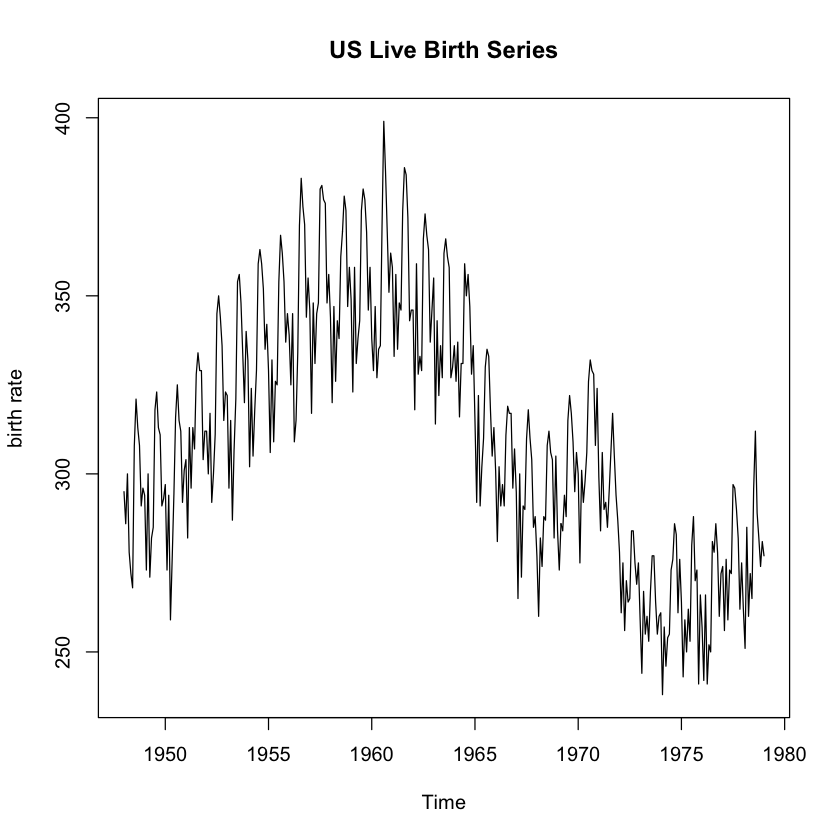

In [9]:
par(bg = "white")
plot(birth, ylab = "birth rate", main = "US Live Birth Series")

We need to flatten this so I will difference and log this then investigate the graphs.

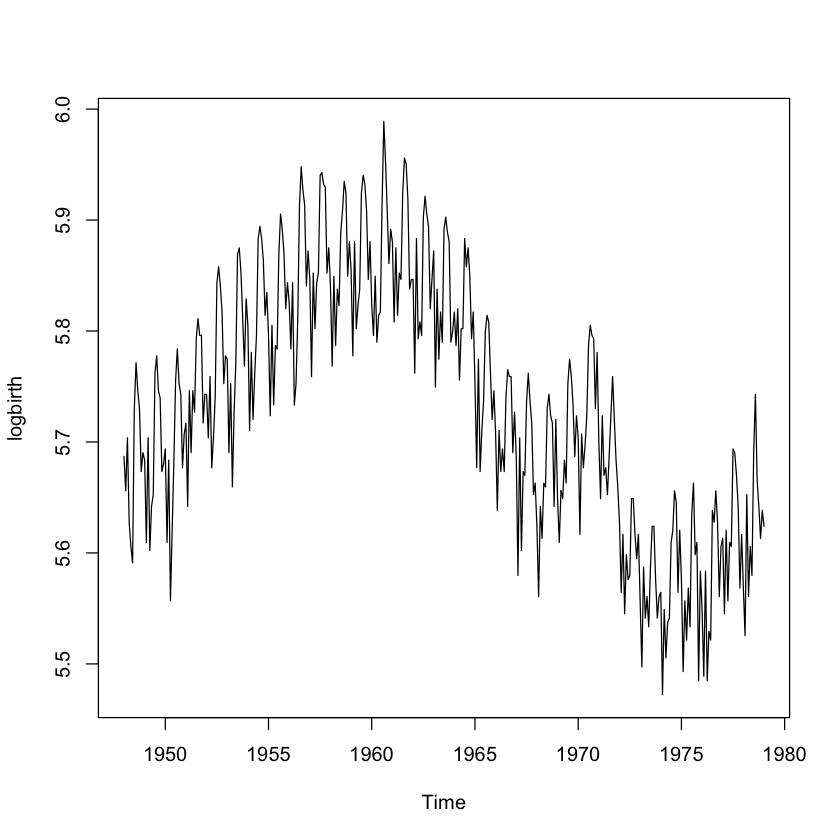

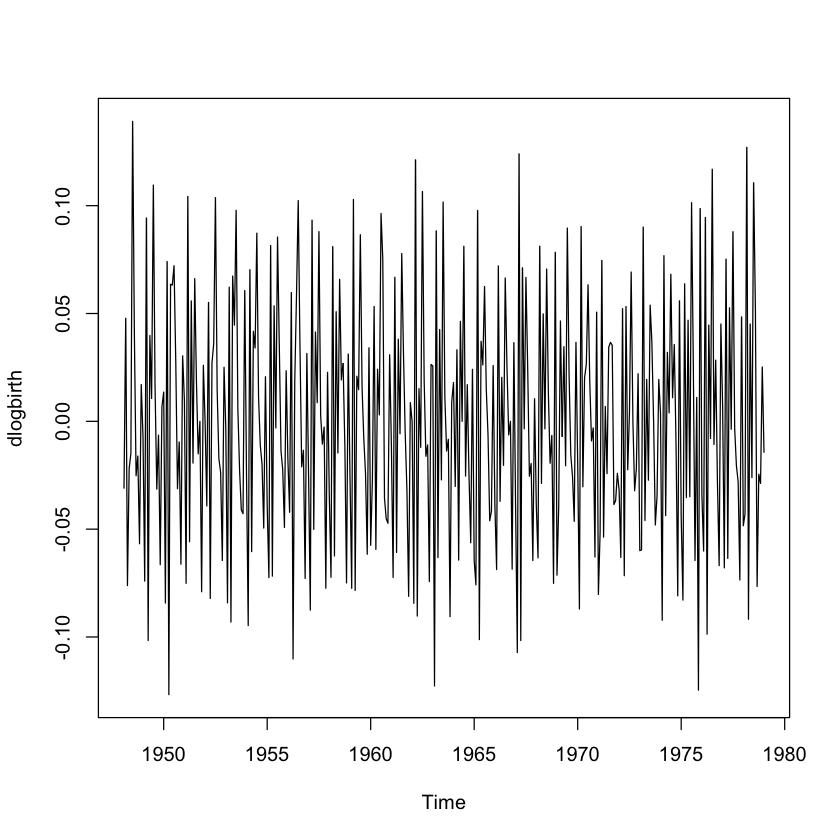

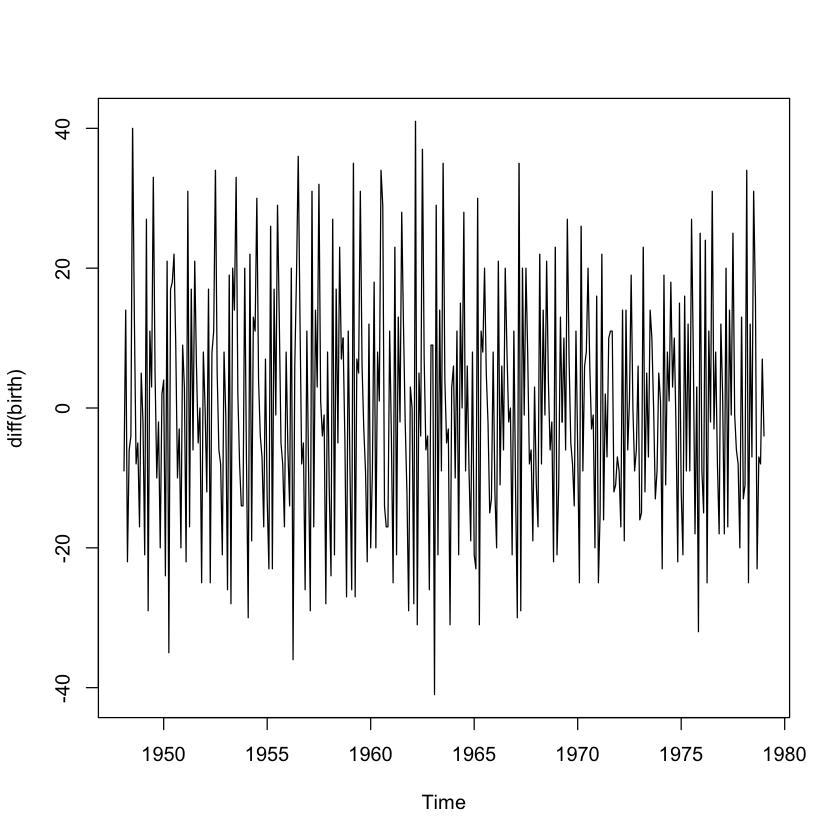

In [12]:
par(bg = "white")

logbirth <- log(birth)
dlogbirth <- diff(log(birth))
dbirth <- diff(birth)

plot(logbirth)

plot(dlogbirth)

plot(diff(birth))

It seems that diff(birth) will actually work the best as it is stationary with the most stable variance.

ACF,-0.32,0.16,-0.08,-0.19,0.09,-0.28,0.06,-0.19,-0.05,0.17,⋯,-0.08,-0.15,0.05,-0.25,0.06,-0.18,-0.03,0.15,-0.22,0.72
PACF,-0.32,0.06,-0.01,-0.25,-0.03,-0.26,-0.17,-0.29,-0.35,-0.16,⋯,-0.03,0.07,-0.04,0.06,0.04,-0.07,-0.06,0.02,-0.04,0.10


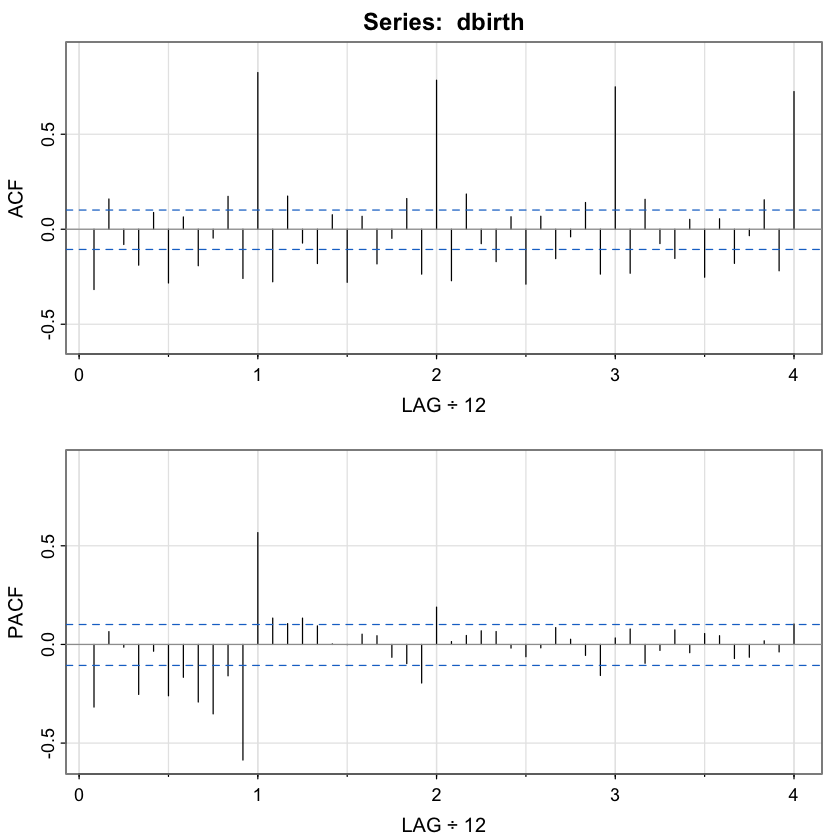

In [13]:
par(bg = "white")
acf2(dbirth)

We clearly have seasonal data so I will plot the seasonal diff before we move on

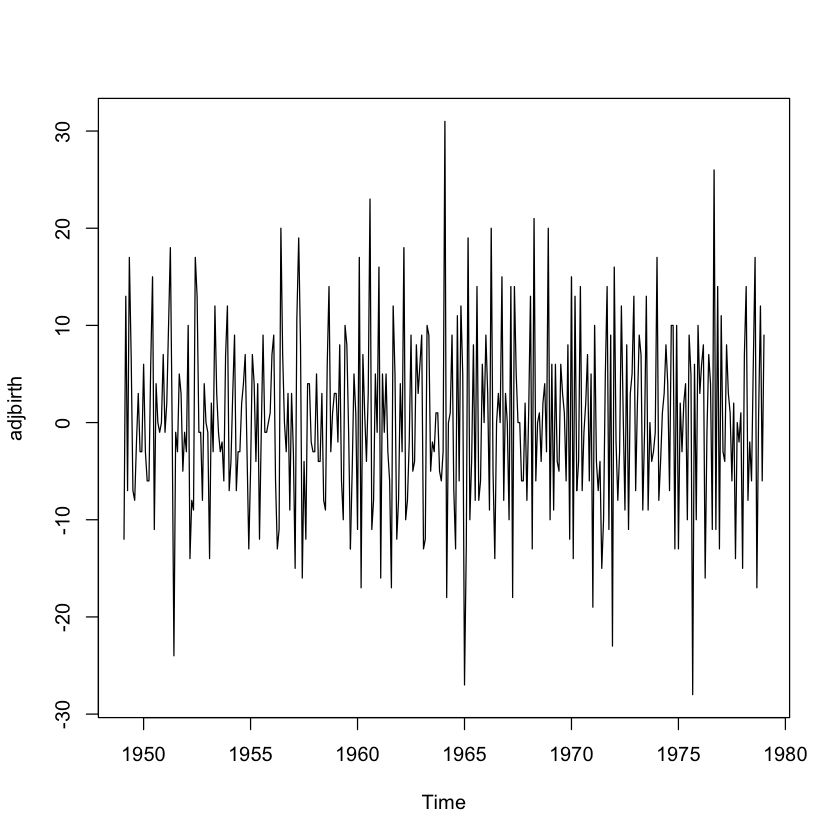

ACF,-0.3,-0.09,-0.09,0.00,0.07,0.03,-0.07,-0.04,0.11,0.04,⋯,0.03,-0.05,0.03,0.10,0,-0.10,-0.03,0.06,0.02,0.01
PACF,-0.3,-0.20,-0.21,-0.14,-0.03,0.02,-0.06,-0.08,0.06,0.08,⋯,-0.01,-0.03,-0.01,0.01,0,0.03,-0.02,-0.07,0.05,-0.11


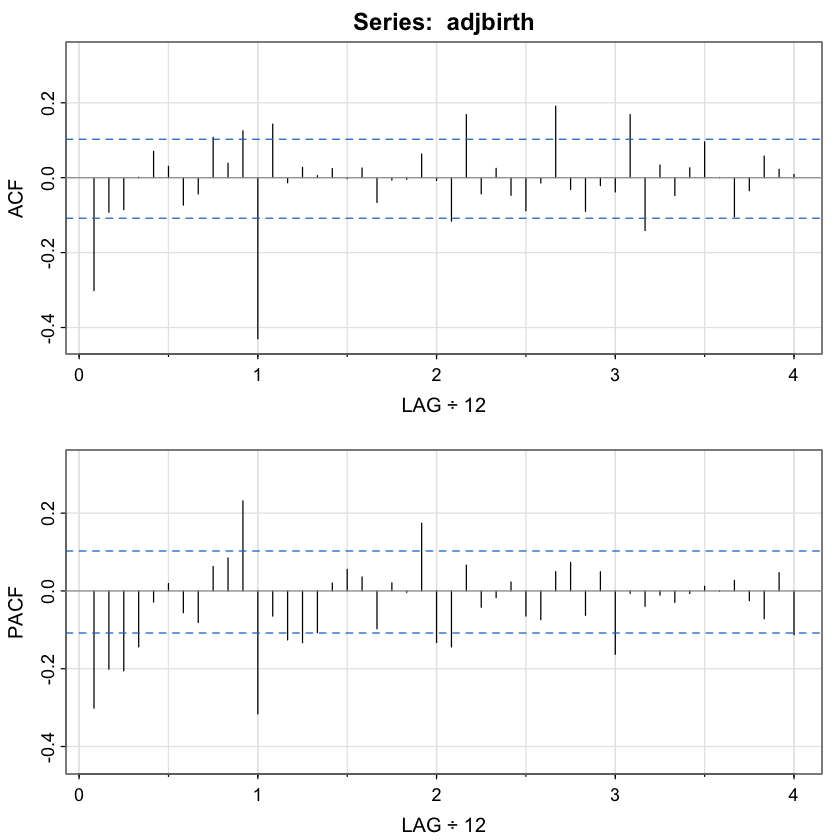

In [16]:
adjbirth <- diff(diff(birth, lag = 12, differences = 1))

par(bg = "white")
plot(adjbirth)
acf2(adjbirth)

We can see that ACF cuts off after lag 1 and PACF cuts off after lag 4 so I will start with p=4, d=1, q=1. There are seasonal spikes in both. In the ACF just at lag 12 and in the PACF at lags 12,24,36 which indiacates to me that we should use P=3, D=1, Q=1.

initial  value 2.227428 
iter   2 value 2.024443
iter   3 value 1.940664
iter   4 value 1.932024
iter   5 value 1.930872
iter   6 value 1.930477
iter   7 value 1.929566
iter   8 value 1.927330
iter   9 value 1.926219
iter  10 value 1.925777
iter  11 value 1.925735
iter  12 value 1.925718
iter  13 value 1.925714
iter  14 value 1.925704
iter  15 value 1.925697
iter  16 value 1.925696
iter  17 value 1.925696
iter  17 value 1.925696
iter  17 value 1.925696
final  value 1.925696 
converged
initial  value 1.927513 
iter   2 value 1.926397
iter   3 value 1.924470
iter   4 value 1.921056
iter   5 value 1.919469
iter   6 value 1.919404
iter   7 value 1.918962
iter   8 value 1.918922
iter   9 value 1.918896
iter  10 value 1.918823
iter  11 value 1.918718
iter  12 value 1.918635
iter  13 value 1.918615
iter  14 value 1.918613
iter  15 value 1.918613
iter  15 value 1.918613
iter  15 value 1.918613
final  value 1.918613 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  

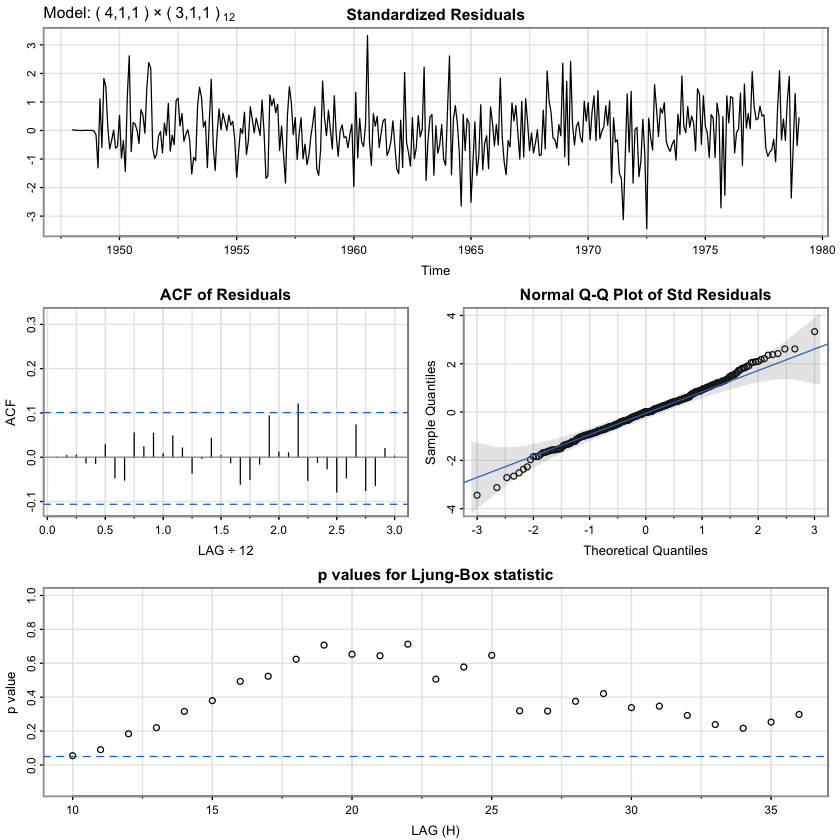

In [18]:
par(bg = "white")
sarima(birth,
       p = 4,
       d = 1,
       q = 1,
       P = 3,
       D = 1,
       Q = 1,
       S = 12)

Most of the coefficients for this model are not significant so I would say this is not a very good model. Let's drop the MA and SAR terms.

initial  value 2.213952 
iter   2 value 1.994086
iter   3 value 1.955325
iter   4 value 1.934066
iter   5 value 1.933651
iter   6 value 1.918205
iter   7 value 1.915371
iter   8 value 1.914279
iter   9 value 1.914124
iter  10 value 1.914112
iter  11 value 1.914110
iter  11 value 1.914110
iter  11 value 1.914110
final  value 1.914110 
converged
initial  value 1.923825 
iter   2 value 1.922837
iter   3 value 1.922062
iter   4 value 1.921993
iter   5 value 1.921989
iter   5 value 1.921989
iter   5 value 1.921989
final  value 1.921989 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1   -0.3875 0.0529  -7.3207   0.000
ar2   -0.2877 0.0550  -5.2314   0.000
ar3   -0.2502 0.0544  -4.6018   0.000
ar4   -0.1747 0.0528  -3.3070   0.001
sma1  -0.8060 0.0431 -18.6959   0.000

sigma^2 estimated as 45.06126 on 355 degrees of freedom 
 
AIC = 6.715188  AICc = 6.715659  BIC = 6.779956 
 


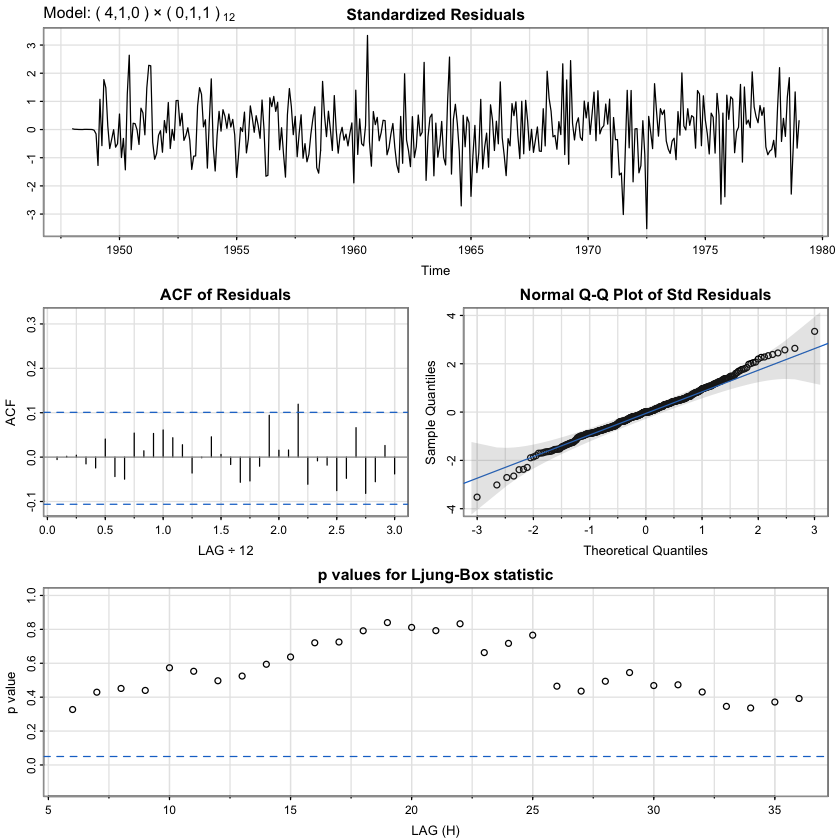

In [19]:
par(bg = "white")
sarima(birth,
       p = 4,
       d = 1,
       q = 0,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

Now this model looks extremely good. All of the coefficients are very significant and the residuals mostly look like white noise except for small spike in the ACF plot. I will see if we can get an even better model. I will start by adding terms to the plot

initial  value 2.214536 
iter   2 value 1.984346
iter   3 value 1.932477
iter   4 value 1.906839
iter   5 value 1.900974
iter   6 value 1.891265
iter   7 value 1.890768
iter   8 value 1.890723
iter   9 value 1.890710
iter  10 value 1.890709
iter  11 value 1.890709
iter  11 value 1.890709
iter  11 value 1.890709
final  value 1.890709 
converged
initial  value 1.919858 
iter   2 value 1.919531
iter   3 value 1.919403
iter   4 value 1.919319
iter   5 value 1.919298
iter   6 value 1.919296
iter   7 value 1.919296
iter   7 value 1.919296
iter   7 value 1.919296
final  value 1.919296 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1   -0.3915 0.0535  -7.3139  0.0000
ar2   -0.2940 0.0567  -5.1866  0.0000
ar3   -0.2618 0.0567  -4.6203  0.0000
ar4   -0.1845 0.0571  -3.2321  0.0013
ar5   -0.0320 0.0545  -0.5875  0.5572
sma1  -0.7585 0.0547 -13.8541  0.0000
sma2  -0.0681 0.0543  -1.2537  0.2108

sigma^2 estimated as 44.75113 on 353 degrees of freed

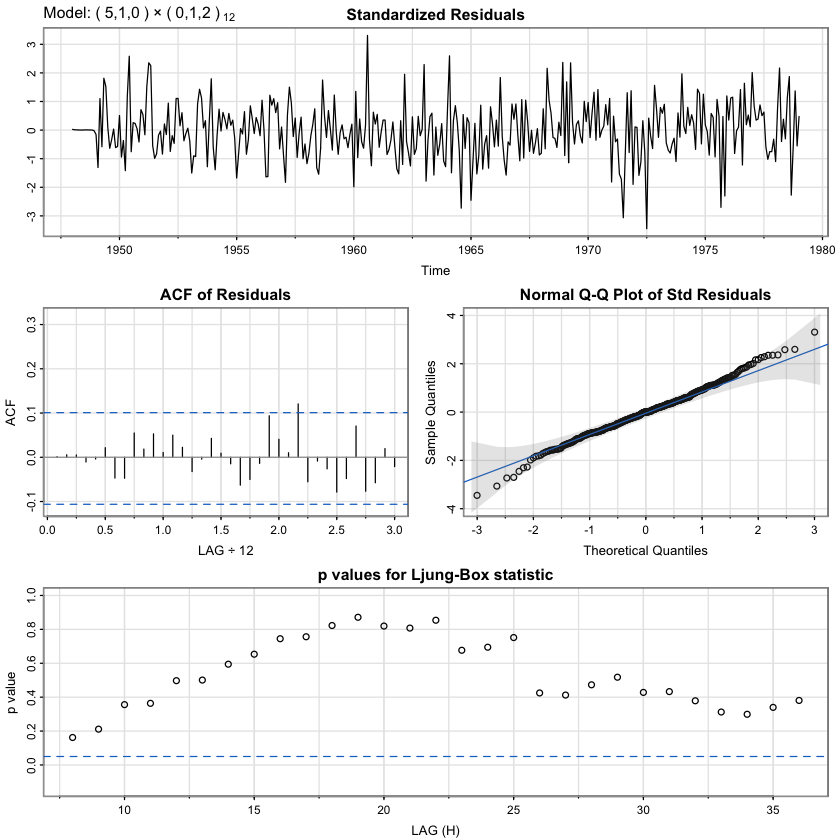

In [20]:
par(bg = "white")
sarima(birth,
       p = 5,
       d = 1,
       q = 0,
       P = 0,
       D = 1,
       Q = 2,
       S = 12)

Based on this information we definintely don't want more AR and SMA terms as the added coeffficients are not statistically significant. Perhaps we can add some SAR terms.

initial  value 2.225260 
iter   2 value 2.009659
iter   3 value 1.958996
iter   4 value 1.926714
iter   5 value 1.922038
iter   6 value 1.918558
iter   7 value 1.917815
iter   8 value 1.917790
iter   9 value 1.917789
iter   9 value 1.917789
iter   9 value 1.917789
final  value 1.917789 
converged
initial  value 1.921965 
iter   2 value 1.920369
iter   3 value 1.919667
iter   4 value 1.919613
iter   5 value 1.919567
iter   6 value 1.919563
iter   7 value 1.919563
iter   7 value 1.919563
iter   7 value 1.919563
final  value 1.919563 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1   -0.3867 0.0529  -7.3140  0.0000
ar2   -0.2865 0.0549  -5.2211  0.0000
ar3   -0.2527 0.0544  -4.6450  0.0000
ar4   -0.1714 0.0529  -3.2389  0.0013
sar1   0.0931 0.0702   1.3267  0.1855
sma1  -0.8465 0.0463 -18.2712  0.0000

sigma^2 estimated as 44.75835 on 354 degrees of freedom 
 
AIC = 6.715892  AICc = 6.716553  BIC = 6.791455 
 


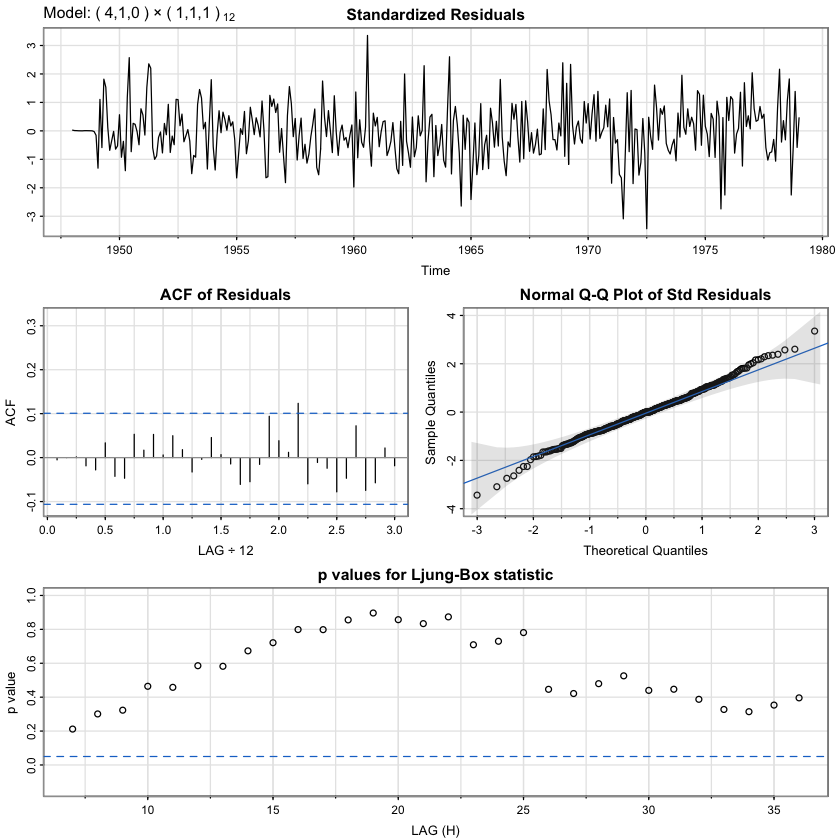

In [21]:
par(bg = "white")
sarima(birth,
       p = 4,
       d = 1,
       q = 0,
       P = 1,
       D = 1,
       Q = 1,
       S = 12)

Based on this we do not want the SAR term. Perhaps we can add an MA term.

initial  value 2.213952 
iter   2 value 1.992643
iter   3 value 1.933142
iter   4 value 1.922203
iter   5 value 1.909032
iter   6 value 1.907281
iter   7 value 1.904549
iter   8 value 1.903968
iter   9 value 1.903492
iter  10 value 1.903097
iter  11 value 1.902290
iter  12 value 1.902193
iter  13 value 1.902186
iter  14 value 1.902186
iter  14 value 1.902186
final  value 1.902186 
converged
initial  value 1.924830 
iter   2 value 1.923755
iter   3 value 1.923699
iter   4 value 1.923512
iter   5 value 1.922045
iter   6 value 1.921790
iter   7 value 1.921682
iter   8 value 1.921669
iter   9 value 1.921666
iter  10 value 1.921666
iter  10 value 1.921666
iter  10 value 1.921666
final  value 1.921666 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1   -0.2737 0.2433  -1.1251  0.2613
ar2   -0.2478 0.1000  -2.4768  0.0137
ar3   -0.2227 0.0796  -2.7979  0.0054
ar4   -0.1541 0.0722  -2.1335  0.0336
ma1   -0.1173 0.2437  -0.4814  0.6305
sma1  -0.8

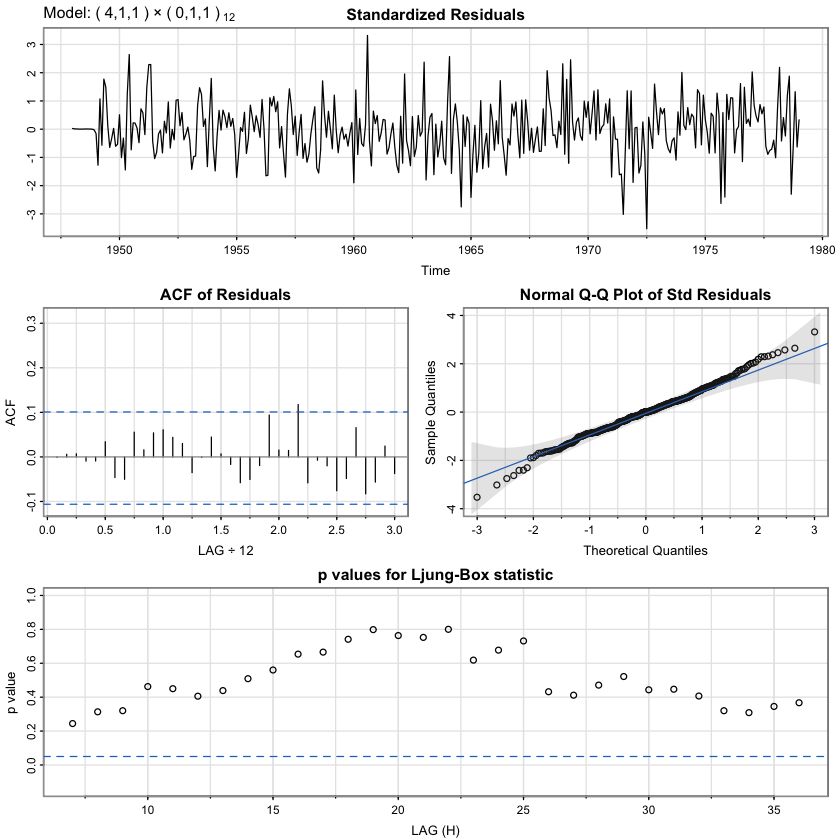

In [22]:
par(bg = "white")
sarima(birth,
       p = 4,
       d = 1,
       q = 1,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

It appears that this model is rejecting the MA term as well. Perhaps we can try some models with no AR term.

initial  value 2.229162 
iter   2 value 2.010933
iter   3 value 1.958170
iter   4 value 1.953441
iter   5 value 1.950740
iter   6 value 1.950579
iter   7 value 1.948918
iter   8 value 1.948305
iter   9 value 1.948049
iter  10 value 1.948036
iter  11 value 1.948035
iter  12 value 1.948035
iter  12 value 1.948035
final  value 1.948035 
converged
initial  value 1.967743 
iter   2 value 1.967269
iter   3 value 1.966699
iter   4 value 1.964680
iter   5 value 1.958371
iter   6 value 1.954778
iter   7 value 1.950990
iter   8 value 1.945702
iter   9 value 1.943568
iter  10 value 1.943039
iter  11 value 1.942644
iter  12 value 1.942612
iter  13 value 1.942609
iter  14 value 1.942606
iter  15 value 1.942604
iter  16 value 1.942602
iter  17 value 1.942602
iter  18 value 1.942602
iter  18 value 1.942602
iter  18 value 1.942602
final  value 1.942602 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ma1   -0.4759 0.0598  -7.9588  0.0000
sar1   0.1296 0.08

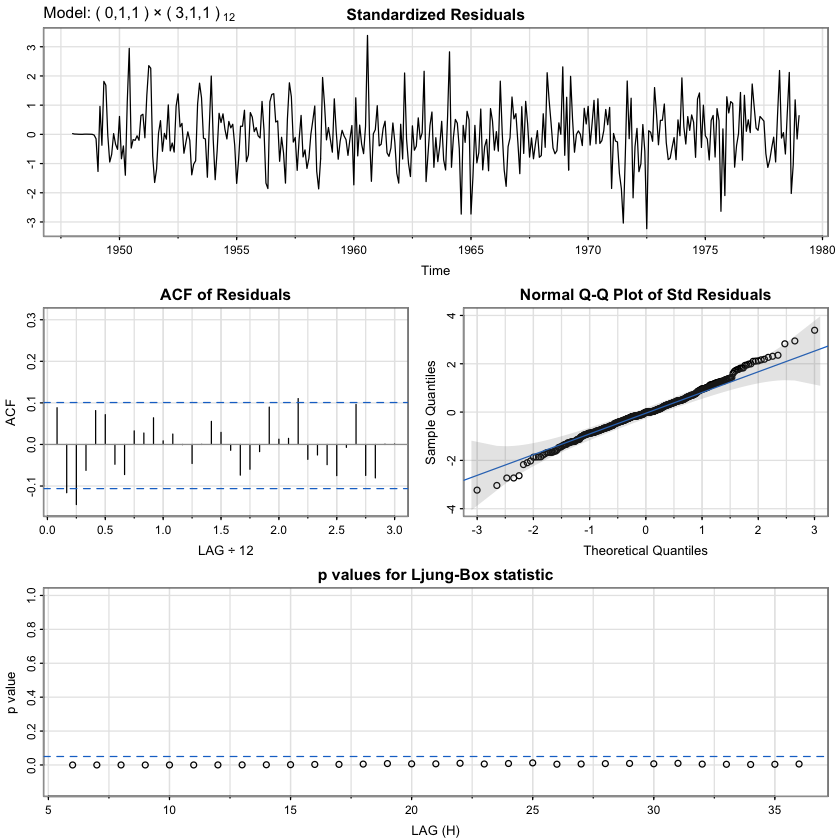

In [23]:
par(bg = "white")
sarima(birth,
       p = 0,
       d = 1,
       q = 1,
       P = 3,
       D = 1,
       Q = 1,
       S = 12)

This model is no good but it is accepting the MA term but not the SAR term.

initial  value 2.219164 
iter   2 value 2.013310
iter   3 value 1.988107
iter   4 value 1.980026
iter   5 value 1.967594
iter   6 value 1.965384
iter   7 value 1.965049
iter   8 value 1.964993
iter   9 value 1.964992
iter   9 value 1.964992
iter   9 value 1.964992
final  value 1.964992 
converged
initial  value 1.951264 
iter   2 value 1.945867
iter   3 value 1.945729
iter   4 value 1.945723
iter   5 value 1.945723
iter   5 value 1.945723
iter   5 value 1.945723
final  value 1.945723 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ma1   -0.4734 0.0598  -7.9097       0
sma1  -0.7861 0.0451 -17.4227       0

sigma^2 estimated as 47.40199 on 358 degrees of freedom 
 
AIC = 6.74599  AICc = 6.746084  BIC = 6.778375 
 


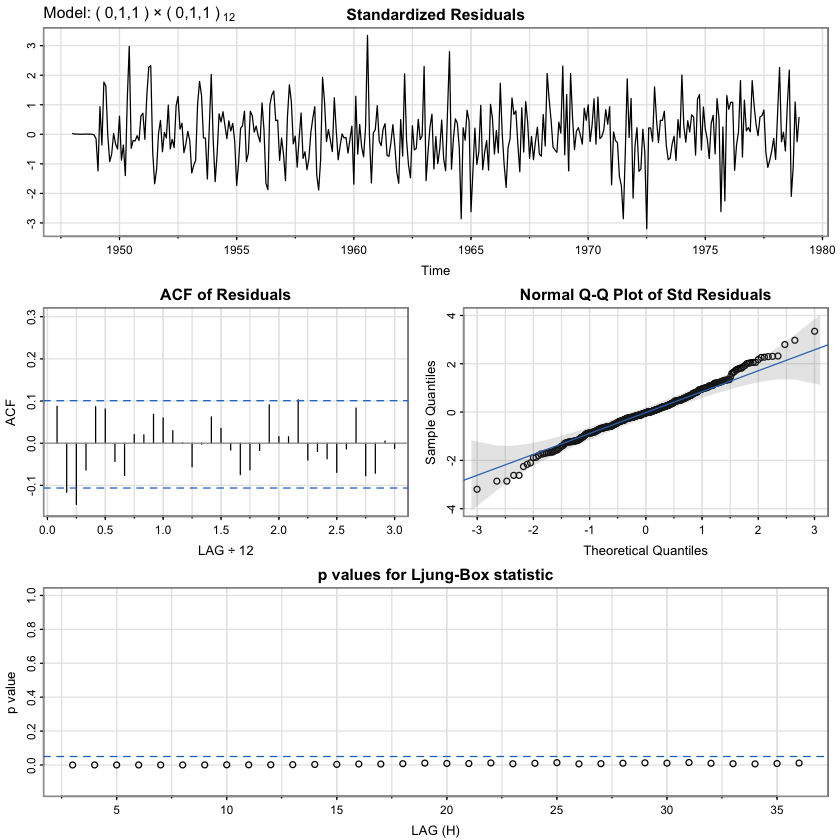

In [24]:
par(bg = "white")
sarima(birth,
       p = 0,
       d = 1,
       q = 1,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

This model may have coefficients that are significant but it is clearly underfitted as the residuals are not white noise at all, as you can see in the Ljung-Box statistic. Let's try one more model.

initial  value 2.227428 
iter   2 value 2.033881
iter   3 value 1.966793
iter   4 value 1.938241
iter   5 value 1.937340
iter   6 value 1.936986
iter   7 value 1.936982
iter   8 value 1.936980
iter   9 value 1.936980
iter   9 value 1.936980
iter   9 value 1.936980
final  value 1.936980 
converged
initial  value 1.951354 
iter   2 value 1.950974
iter   3 value 1.950541
iter   4 value 1.950536
iter   5 value 1.950535
iter   5 value 1.950535
iter   5 value 1.950535
final  value 1.950535 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1   -0.4239 0.0521  -8.1337  0.0000
ar2   -0.3280 0.0563  -5.8225  0.0000
ar3   -0.2392 0.0556  -4.3020  0.0000
ar4   -0.1637 0.0529  -3.0957  0.0021
sar1  -0.6414 0.0535 -11.9840  0.0000
sar2  -0.3972 0.0607  -6.5426  0.0000
sar3  -0.2359 0.0550  -4.2869  0.0000

sigma^2 estimated as 48.50404 on 353 degrees of freedom 
 
AIC = 6.783391  AICc = 6.784275  BIC = 6.869749 
 


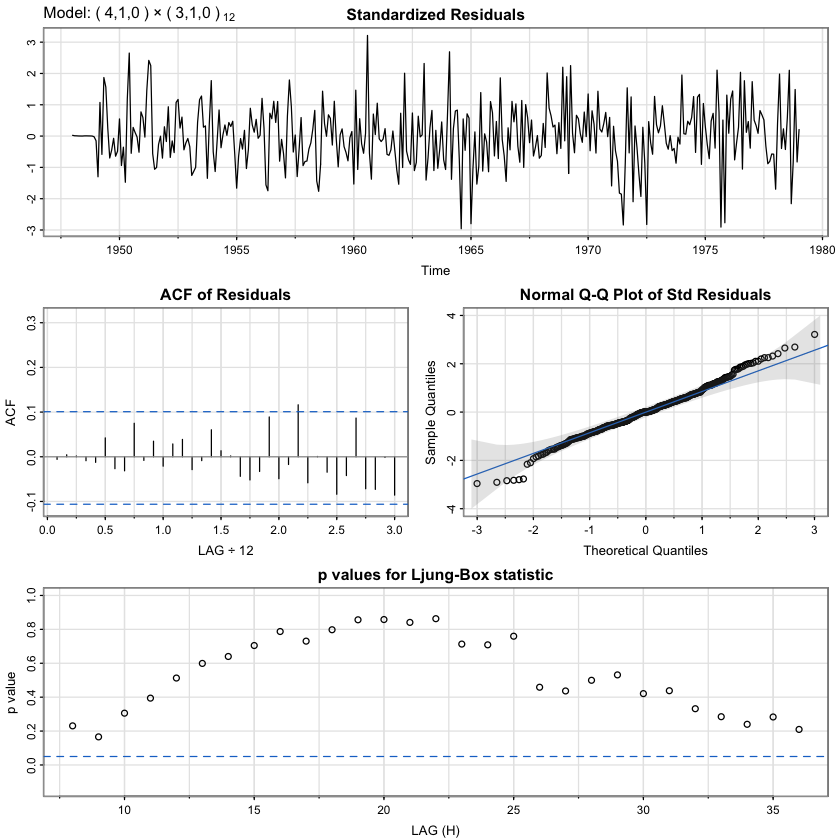

In [26]:
par(bg = "white")
sarima(birth,
       p = 4,
       d = 1,
       q = 0,
       P = 3,
       D = 1,
       Q = 0,
       S = 12)

This model actually looks pretty good, as well. I will compare it to (4,1,0)x(0,1,1)

(4,1,0)x(0,1,1): AIC = 6.715188  AICc = 6.715659  BIC = 6.779956

(4,1,0)x(3,1,0): AIC = 6.783391  AICc = 6.784275  BIC = 6.869749

These values are lower for (4,1,0)x(0,1,1) so I shall use that to do my forecasting.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1979,,256.7714,279.2754,262.4658,273.1821,270.1264,293.6774,300.3533,294.7415,288.3902,271.5444,282.6193
1980,274.6797,,,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1979,,6.712770,7.871763,8.492822,8.886189,9.253364,9.873623,10.450538,10.956834,11.397603,11.809176,12.232429
1980,12.650861,,,,,,,,,,,


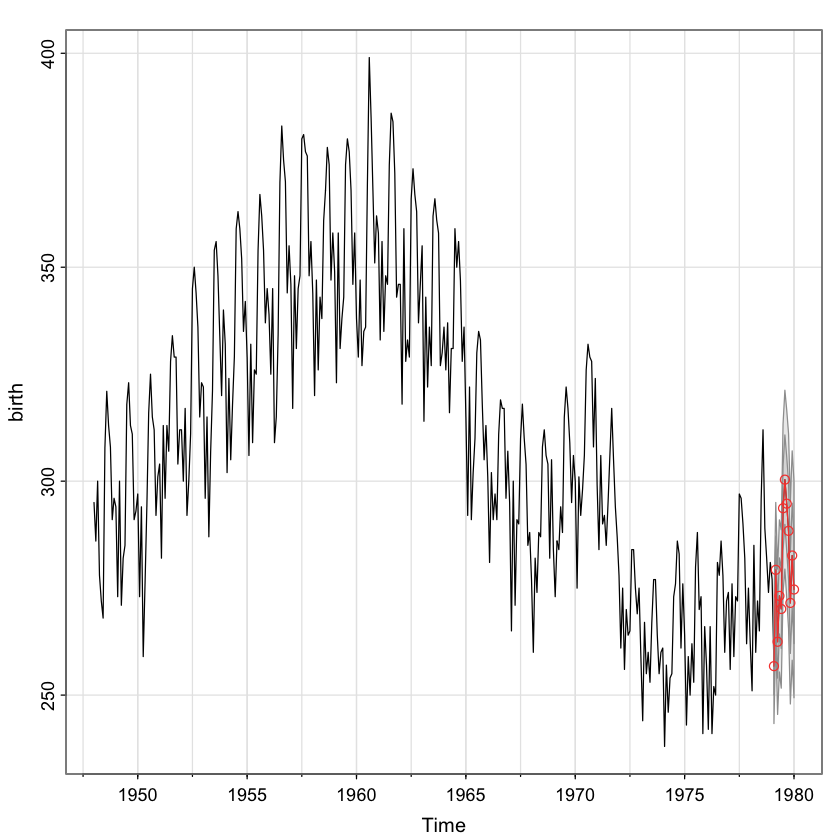

In [29]:
par(bg = "white")
forecast <- sarima.for(birth,
                       n.ahead = 12,
                       p = 4,
                       d = 1,
                       q = 0,
                       P = 0,
                       D = 1,
                       Q = 1,
                       S = 12,
                       plot.all = TRUE)
forecast

In [31]:
# Define matrix data
pred <- matrix(c(
  NA, 256.7714, 279.2754, 262.4658, 273.1821, 270.1264, 293.6774, 300.3533, 294.7415, 288.3902, 271.5444, 282.6193,
  274.6797, rep(NA, 11)
), nrow = 2, byrow = TRUE)

se <- matrix(c(
  NA, 6.712770, 7.871763, 8.492822, 8.886189, 9.253364, 9.873623, 10.450538, 10.956834, 11.397603, 11.809176, 12.232429,
  12.650861, rep(NA, 11)
), nrow = 2, byrow = TRUE)

# Compute prediction intervals
lower_95 <- pred - 1.96 * se
upper_95 <- pred + 1.96 * se

# Convert to data frame for printing
forecast_df <- data.frame(
  Year = rep(1979:1980, each = 12),
  Month = rep(month.abb, times = 2),
  PointForecast = as.vector(t(pred)),
  StdError = as.vector(t(se)),
  Lower95 = as.vector(t(lower_95)),
  Upper95 = as.vector(t(upper_95))
)

# Filter out rows with NA forecasts
forecast_df <- forecast_df[!is.na(forecast_df$PointForecast), ]
rownames(forecast_df) <- NULL

print(forecast_df)

   Year Month PointForecast  StdError  Lower95  Upper95
1  1979   Feb      256.7714  6.712770 243.6144 269.9284
2  1979   Mar      279.2754  7.871763 263.8467 294.7041
3  1979   Apr      262.4658  8.492822 245.8199 279.1117
4  1979   May      273.1821  8.886189 255.7652 290.5990
5  1979   Jun      270.1264  9.253364 251.9898 288.2630
6  1979   Jul      293.6774  9.873623 274.3251 313.0297
7  1979   Aug      300.3533 10.450538 279.8702 320.8364
8  1979   Sep      294.7415 10.956834 273.2661 316.2169
9  1979   Oct      288.3902 11.397603 266.0509 310.7295
10 1979   Nov      271.5444 11.809176 248.3984 294.6904
11 1979   Dec      282.6193 12.232429 258.6437 306.5949
12 1980   Jan      274.6797 12.650861 249.8840 299.4754
